In [1]:
# import #
import os
import math
import h5py
import numpy as np
import matplotlib as mpl
import grtrans_batch as gr
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# parameter #
mbhole = 10
spin = 0.9375

In [3]:
# parameter #
xlim = 50
ngrid = 500
kev = 2.41799050402417e17

In [4]:
# parameter #
a_spin = spin
mbh = mbhole

In [5]:
# parameter #
freq = 2*kev
ang = 30
amu = np.cos(ang*math.pi/180)

In [6]:
# grid #
x = np.linspace(-xlim, xlim, ngrid)
X, Y = np.meshgrid(x, x, indexing="ij")

In [7]:
x = gr.grtrans()
x.write_grtrans_inputs('inputs.in',nfreq=1,nmu=1,mumin=amu,mumax=amu,fmin=freq,fmax=freq,fname="THINDISK",
                       ename="BBPOL",nvals=22,spin=a_spin,mbh=mbh,nn=[ngrid,ngrid,1],gridvals=[-xlim, xlim,-xlim, xlim])
x.run_grtrans()
x.read_grtrans_output()
vals = x.ivals[:,:,0]

THINDISK
grtrans.out
500000
(250000, 22, 1) (5500000,)


In [8]:
stokesi = (vals[:,0].reshape((ngrid,ngrid)))
stokesq = (vals[:,1].reshape((ngrid,ngrid)))
stokesu = (vals[:,2].reshape((ngrid,ngrid)))

In [9]:
i_all = np.sum(stokesi)
q_all = np.sum(stokesq)
u_all = np.sum(stokesu)
lp = np.sqrt(u_all**2 + q_all**2)/i_all * 100
evpa = (180/math.pi)*0.5*np.arctan2(u_all,q_all)
evpa += 90.
if(evpa > 90): evpa -= 180.
print(lp)

0.11335836423917174


/home/leon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib64/python3.6/site-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib64/python3.6/site-packages/numpy/core/function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start


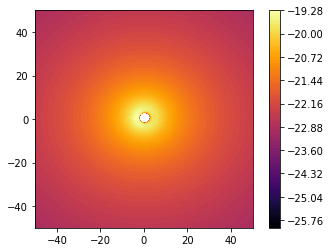

In [10]:
# plot #
cmap = "inferno"
Z = np.log10(stokesi)
vmin = np.nanmin(Z)
vmax = np.nanmax(Z)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
tick = np.linspace(vmin, vmax, 10)
fig, axs = plt.subplots()
plt.contourf(X, Y, Z, 100, cmap=cmap)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.gca().set_aspect("equal")
plt.colorbar()

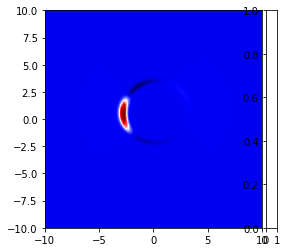

In [11]:
# plot #
cmap = "seismic"
Z = stokesq
#vmin = Z.min()
#vmax = Z.max()
#norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
#tick = np.linspace(vmin, vmax, 10)
fig, axs = plt.subplots()
plt.contourf(X, Y, Z, 1000, cmap=cmap)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect("equal")
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)

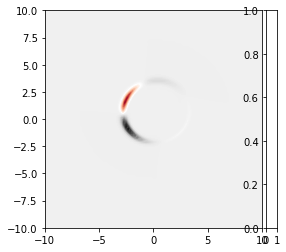

In [12]:
# plot #
cmap = "RdGy"
Z = stokesu
vmin = Z.min()
vmax = Z.max()
norm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
tick = np.linspace(vmin, vmax, 10)
fig, axs = plt.subplots()
plt.contourf(X, Y, Z, 1000, cmap=cmap)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect("equal")
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)

In [15]:
reh = 1 + np.sqrt(1 - 0.9375*0.9375)

/home/leon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


(1.3479852726768764, 3.0)

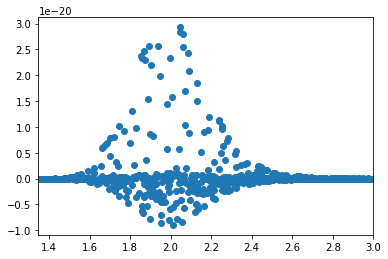

In [17]:
fac = (r/reh)**(-3)
plt.scatter(r.flatten(), stokesq.flatten()/fac.flatten())
plt.xlim(reh, 3)